In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import import_ipynb
from Data.Data_Cleaning import replace_survey_words

In [10]:
df = pd.read_csv('Data/clean_data.csv')

In [11]:
def categorize_happiness(val):
    val = float(val)
    if val <= 3:
        return 0  # Low happiness
    elif val <= 6:
        return 1  # Medium happiness
    else:
        return 2  # High happiness

df = df.copy()

df['RATEHAP'] = df['RATEHAP'].apply(categorize_happiness)

X = df.drop(columns=['RATEHAP'])
y = df['RATEHAP']
X_cleaned = replace_survey_words(X)

full_data = X_cleaned.copy()
full_data['RATEHAP'] = y

full_data = full_data.dropna()

X = full_data.drop(columns=['RATEHAP'])
y = full_data['RATEHAP']

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# From training set, take 10% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)



<string>:463: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
<string>:470: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
<string>:469: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
<string>:510: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

In [12]:
X_train = X_train.apply(pd.to_numeric, errors='ignore')
X_val = X_val.apply(pd.to_numeric, errors='ignore')
X_test = X_test.apply(pd.to_numeric, errors='ignore')

C:\Users\kimab\AppData\Local\Temp\ipykernel_21460\2691010674.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X_train = X_train.apply(pd.to_numeric, errors='ignore')
C:\Users\kimab\AppData\Local\Temp\ipykernel_21460\2691010674.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X_val = X_val.apply(pd.to_numeric, errors='ignore')
C:\Users\kimab\AppData\Local\Temp\ipykernel_21460\2691010674.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X_test = X_test.apply(pd.to_numeric, errors='ignore')


In [13]:
print("Unique values in EMPLSIT_1:")
print(X_train['EMPLSIT_1'].unique())

Unique values in EMPLSIT_1:
['Not employed but looking for a job ' 'Retired and not employed'
 'Student and not employed' 'Self-employed including seasonal work '
 'Not employed and not looking for a job'
 'Working either part-time or full time ' 'Disabled and unable to work']


In [14]:
print("NaNs in X_train:", X_train.isna().sum().sum())
print("NaNs in X_val:", X_val.isna().sum().sum())
print("NaNs in X_test:", X_test.isna().sum().sum())


NaNs in X_train: 0
NaNs in X_val: 0
NaNs in X_test: 0


In [15]:
# One-Hot Encode on training columns
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns

X_train_encoded = pd.get_dummies(X_train, columns=non_numeric_columns, drop_first=False)
X_val_encoded = pd.get_dummies(X_val, columns=non_numeric_columns, drop_first=False)
X_test_encoded = pd.get_dummies(X_test, columns=non_numeric_columns, drop_first=False)

# Align validation and test sets to training columns (fill missing columns with 0)
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Now that both datasets are encoded, we can directly calculate the correlation matrix on the training data
correlation_matrix = X_train_encoded.corr()

# Print the correlation matrix
print(correlation_matrix)

                     RESPAGE   FEELTRU   FEELEMP   FEELCLS   FEELRLY  \
RESPAGE             1.000000  0.056622  0.298526  0.038661  0.163191   
FEELTRU             0.056622  1.000000  0.069667  0.312260  0.438426   
FEELEMP             0.298526  0.069667  1.000000 -0.205539 -0.285875   
FEELCLS             0.038661  0.312260 -0.205539  1.000000  0.562162   
FEELRLY             0.163191  0.438426 -0.285875  0.562162  1.000000   
...                      ...       ...       ...       ...       ...   
INTDATE_2024-10-03 -0.125361 -0.206305 -0.112388  0.085727  0.097904   
INTDATE_2024-10-04 -0.125361  0.148191 -0.112388  0.085727  0.097904   
INTDATE_2024-10-09  0.306348  0.084951 -0.051646 -0.010916  0.139626   
INTDATE_2024-10-10 -0.145771  0.148191  0.192308 -0.101035 -0.243363   
INTLANG_Armenian         NaN       NaN       NaN       NaN       NaN   

                     FEELREJ   GALLTRU   LIFESAT  FATEINLF  BUSINUSA  ...  \
RESPAGE             0.193452  0.151099 -0.091085 -0.114722

In [16]:
print("NaNs in X_train:", X_train_encoded.isna().sum().sum())
print("NaNs in X_val:", X_val_encoded.isna().sum().sum())
print("NaNs in X_test:", X_test_encoded.isna().sum().sum())


NaNs in X_train: 0
NaNs in X_val: 0
NaNs in X_test: 0


In [17]:
threshold = 0.9

# Calculate the correlation matrix only on the training data
correlation_matrix = X_train_encoded.corr()

# Find highly correlated features based on the threshold
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Check correlation
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

# List of features that are highly correlated (to drop)
print("Highly correlated features:", highly_correlated)

# Drop the highly correlated features from the training set
X_train_encoded = X_train_encoded.drop(columns=highly_correlated)
X_val_encoded = X_val_encoded.drop(columns=highly_correlated)
X_test_encoded = X_test_encoded.drop(columns=highly_correlated)

# Align the validation and test sets with the training set columns
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

Highly correlated features: {'MAINENEMOS_Armenia', 'INTDATE_2024-08-23', 'RMOEDUC_No primary education', 'SECNDFRE_1', 'SECNDLANGKA_Not Mentioned', 'SECNDLAAZ_No other language except interview language', 'INTACFB_Legal skip', 'JOBSTART_Legal skip', 'MAINENEM_Israel', 'SECNDLAAR_No other language except interview language', 'INTDATE_2024-09-19', 'SECNDLAAV_Not Mentioned', 'INTDATE_2024-09-02', 'APPYOUT_Legal skip', 'SECNDLAOT_No other language except interview language', 'SECNDLAZA_Not Mentioned', 'IMPISS1OS_To survive', 'PEACEPQSTOS_No third party involvement', 'APPVKN_Legal skip', 'PEACEPQSTOS_Change of the leader of Azerbaijan', 'IMPISS1OS_Lack of development of military', 'SECNDLANHE_Not Mentioned', 'IMPISS2OS_Recognition of Genocide', 'WORKTYP_Refuse to answer', 'RESFRWAR_1_Other', 'MONYTOT_1_Refuse to answer', 'IMPISS1OS_Lack of trust', 'WORKTYP_Run my own business, Self-employed without employees', 'WORKTYP_Legal skip', 'MAINFRNOS_Legal skip', 'SECNDLAAS_No other language except

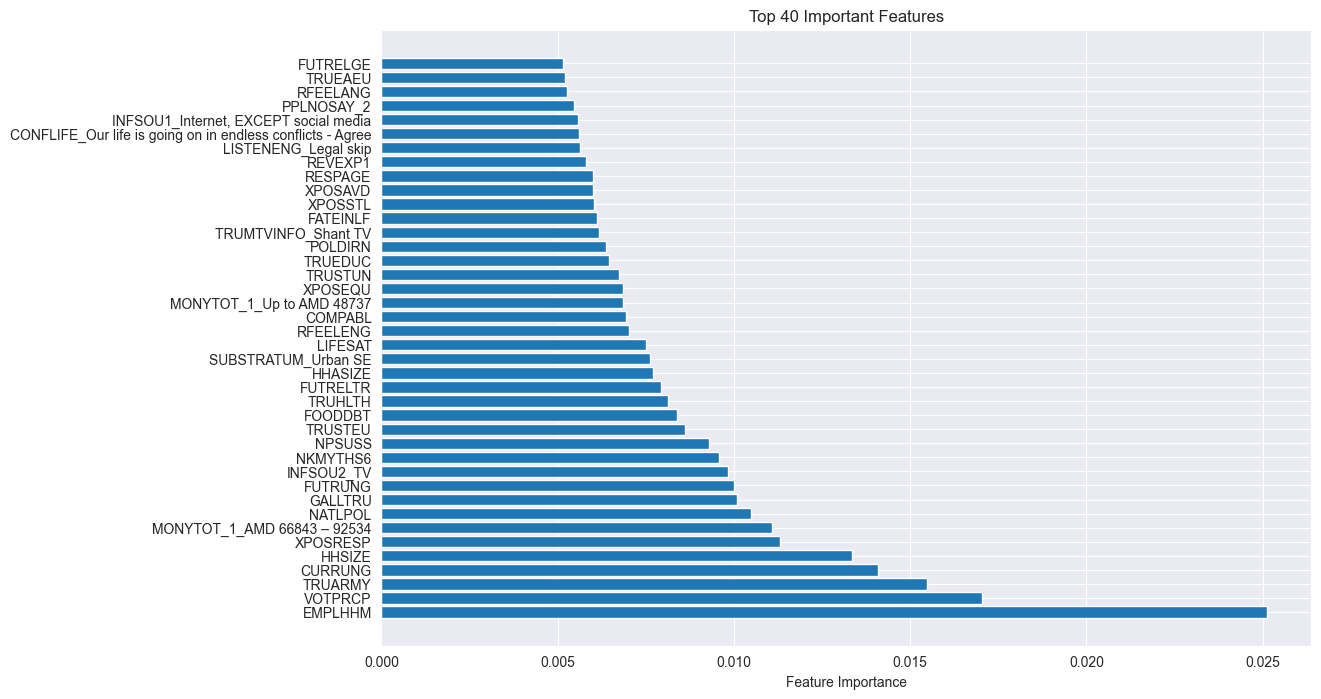

                                               Feature  Importance
158                                            EMPLHHM    0.025125
76                                             VOTPRCP    0.017043
57                                             TRUARMY    0.015492
162                                            CURRUNG    0.014085
173                                             HHSIZE    0.013348
119                                           XPOSRESP    0.011305
542                        MONYTOT_1_AMD 66843 – 92534    0.011073
45                                             NATLPOL    0.010474
6                                              GALLTRU    0.010079
163                                            FUTRUNG    0.010005
210                                         INFSOU2_TV    0.009841
116                                           NKMYTHS6    0.009584
175                                             NPSUSS    0.009287
69                                             TRUSTEU    0.00

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame to view the feature importances
importance_df = pd.DataFrame({'Feature': X_train_encoded.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 40 most important features
plt.figure(figsize=(12, 8))
plt.barh(importance_df.head(40)['Feature'], importance_df.head(40)['Importance'])
plt.title('Top 40 Important Features')
plt.xlabel('Feature Importance')
plt.show()

# List the top 40 most important features
print(importance_df.head(40))

In [19]:
top_features = importance_df['Feature'].head(40).tolist()

# Update the training, validation, and test sets to only include the top 40 features
X_train_selected = X_train_encoded.reindex(columns=top_features, fill_value=0)
X_val_selected = X_val_encoded.reindex(columns=top_features, fill_value=0)
X_test_selected = X_test_encoded.reindex(columns=top_features, fill_value=0)

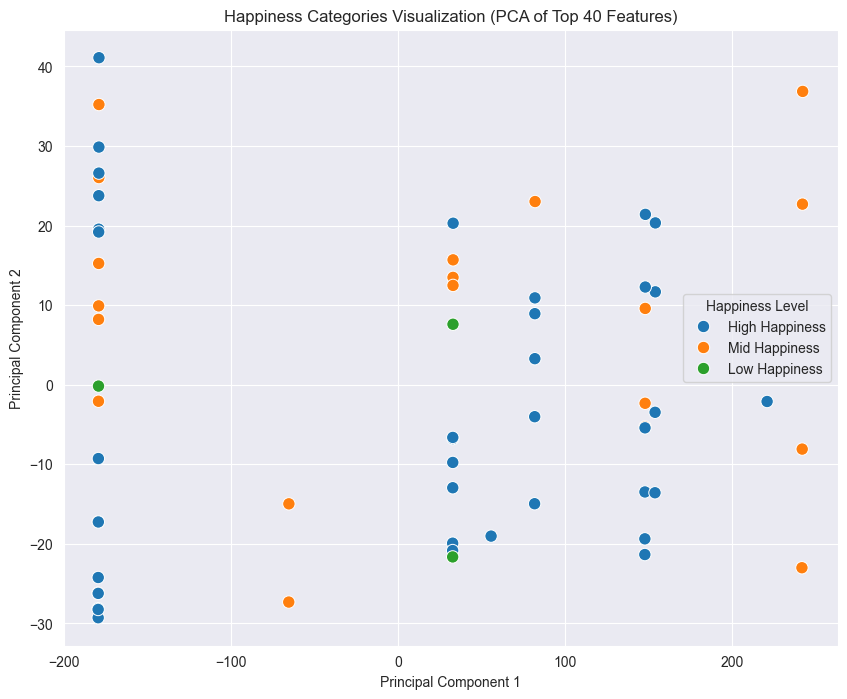

In [20]:
# Map numeric labels to string labels for plotting
happiness_labels = {0: 'Low Happiness', 1: 'Mid Happiness', 2: 'High Happiness'}
y_train_labeled = [happiness_labels[val] for val in y_train]

# Use PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_selected)

# Create plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], 
                hue=y_train_labeled, 
                alpha=1, s=80)

plt.title("Happiness Categories Visualization (PCA of Top 40 Features)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Happiness Level')
plt.grid(True)

plt.show()

# After analyzing the plot we can conclude that the data is nor linearly separable, 
# so we cannot use Logistic Regression

## KNN

KNN is a non-parametric algorithm, meaning it doesn't assume any predefined form for the underlying data distribution.

In our case, where the target variable (happiness level) might depend on complex, non-linear relationships between features, KNN can perform well because it doesn’t rely on the assumption of linearity.


In [21]:
print("NaNs in X_train_selected:", X_train_selected.isna().sum().sum())
print("NaNs in X_val_selected:", X_val_selected.isna().sum().sum())
print("NaNs in X_test_selected:", X_test_selected.isna().sum().sum())


NaNs in X_train_selected: 0
NaNs in X_val_selected: 0
NaNs in X_test_selected: 0


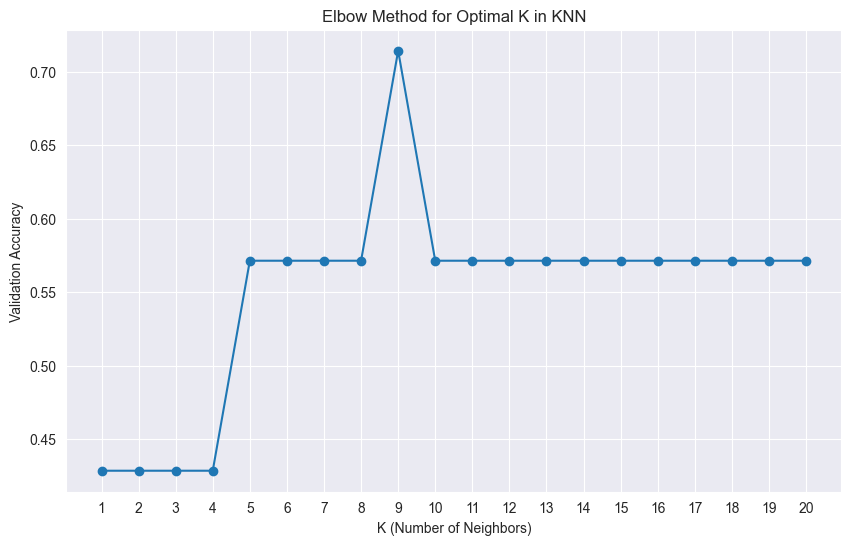

Validation Accuracy: 71.43%


In [22]:
scaler = StandardScaler()  # Create a scaler object
X_train_scaled = scaler.fit_transform(X_train_selected)  # Fit and transform the training data
X_val_scaled = scaler.transform(X_val_selected)  # Transform the validation data
X_test_scaled = scaler.transform(X_test_selected)  # Transform the test data


k_values = range(1, 21)
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_val_pred = knn.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(acc)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, val_accuracies, marker='o')
plt.xticks(k_values)
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Validation Accuracy')
plt.title('Elbow Method for Optimal K in KNN')
plt.grid(True)
plt.show()


knn = KNeighborsClassifier(n_neighbors=9)  # Experiment with different K values, here we start with K=5

# Step 3: Train the KNN model
knn.fit(X_train_scaled, y_train)  # Train the model using the scaled training data

# Step 4: Make predictions on the validation and test set
y_val_pred = knn.predict(X_val_scaled)  # Predict the target values for the validation set
y_test_pred = knn.predict(X_test_scaled)  # Predict the target values for the test set

# Step 5: Evaluate the model
# Accuracy on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

test_accuracy = accuracy_score(y_test, y_test_pred)


## Desicion Tree

A decision tree is a good model for our case because it handles mixed data types, captures non-linear relationships, and works well without feature scaling.

In [23]:
dt_model = DecisionTreeClassifier(
    max_depth=7,  # Limit tree depth to prevent overfitting
    min_samples_split=15,  # Minimum number of samples required to split a node
    min_samples_leaf=6,  # Minimum number of samples required at a leaf node
    random_state=42
)

dt_model.fit(X_train_selected, y_train)

y_val_pred_dt = dt_model.predict(X_val_selected)
y_test_pred_dt = dt_model.predict(X_test_selected)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_dt))

Validation Accuracy: 0.7142857142857143


## Test Accuracy

In [24]:
# Accuracy of KNN on test set
print(f"Test Accuracy of KNN: {test_accuracy * 100:.2f}%")

# Accuracy of DT
print(f"Test Accuracy of DT: {accuracy_score(y_test, y_test_pred_dt) * 100:.2f}%")

Test Accuracy of KNN: 70.59%
Test Accuracy of DT: 58.82%
